# Культурист-датасаентист

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.   
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.   
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.   
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.   
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.   
А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.

## Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
* Данные клиента за предыдущий до проверки факта оттока месяц:
  * `gender` — пол;
  * `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
  * `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
  * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
  * `Phone` — наличие контактного телефона;
  * `Age` — возраст;
  * `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
  * `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
  * `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
  * `Group_visits` — факт посещения групповых занятий;
  * `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
  * `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
  * `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В выгрузке 4000 записей. Пустых значений нет.
Типы данных определены правильно за исключением `Month_to_end_contract`, поменяем на int.

In [5]:
data.Month_to_end_contract = data.Month_to_end_contract.astype('int')

In [6]:
data.Churn.sum() / len(data) * 100

26.525

Отток клиентов составляет 26.5%.   
Рассмотрим средние значения признаков и построим гистограммы.

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Churn = 1 - факт оттока в текущем месяце.

In [8]:
data.groupby('Churn').agg(['mean', 'median']).T

Churn                                              0           1
gender                            mean      0.510037    0.510839
                                  median    1.000000    1.000000
Near_Location                     mean      0.873086    0.768143
                                  median    1.000000    1.000000
Partner                           mean      0.534195    0.355325
                                  median    1.000000    0.000000
Promo_friends                     mean      0.353522    0.183789
                                  median    0.000000    0.000000
Phone                             mean      0.903709    0.902922
                                  median    1.000000    1.000000
Contract_period                   mean      5.747193    1.728558
                                  median    6.000000    1.000000
Group_visits                      mean      0.464103    0.268615
                                  median    0.000000    0.000000
Age                               mean     29.976523   26.989632
                                  median   30.000000   27.000000
Avg_additional_charges_total      mean    158.445715  115.082899
                                  median  149.881171  103.814686
Month_to_end_contract             mean      5.283089    1.662582
                                  median    6.000000    1.000000
Lifetime                          mean      4.711807    0.990575
                                  median    4.000000    1.000000
Avg_class_frequency_total         mean      2.024876    1.474995
                                  median    2.043252    1.491187
Avg_class_frequency_current_month mean      2.027882    1.044546
                                  median    2.046697    0.979445

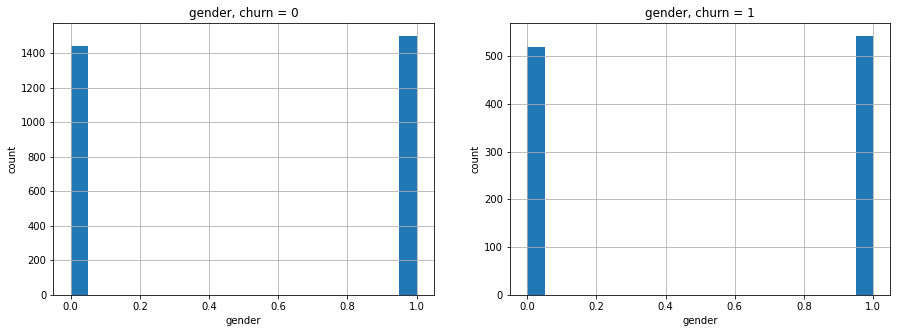

------------------------------------------------------------------------------------------------------------------------


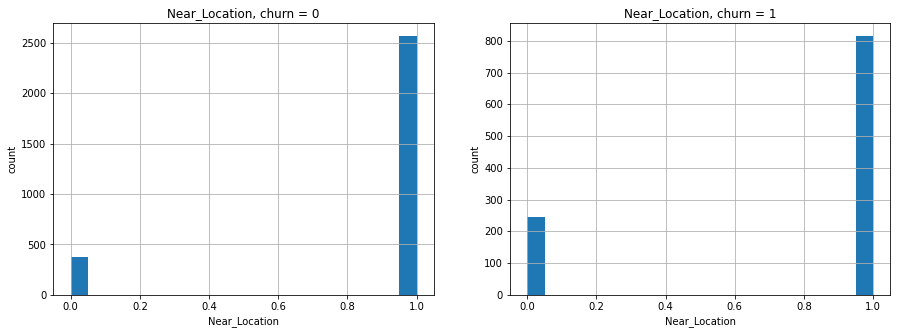

------------------------------------------------------------------------------------------------------------------------


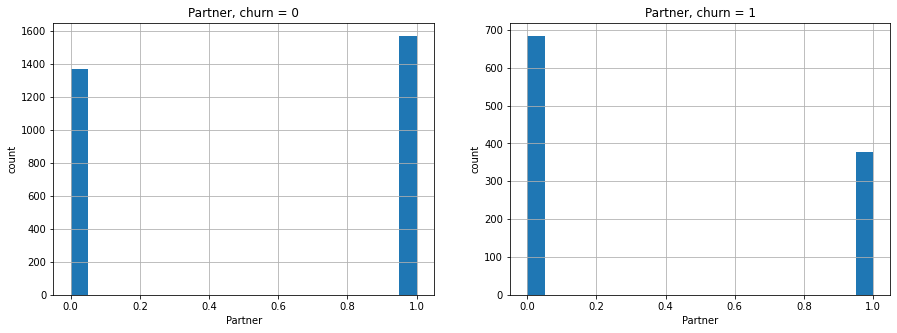

------------------------------------------------------------------------------------------------------------------------


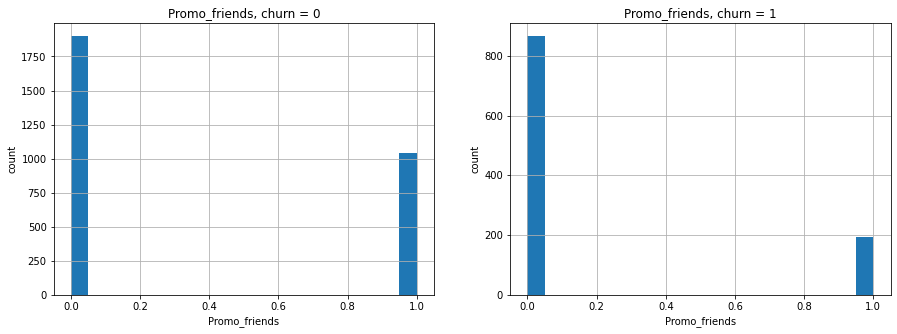

------------------------------------------------------------------------------------------------------------------------


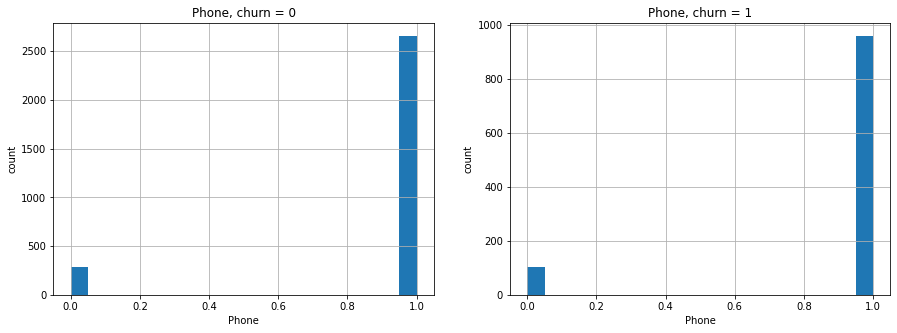

------------------------------------------------------------------------------------------------------------------------


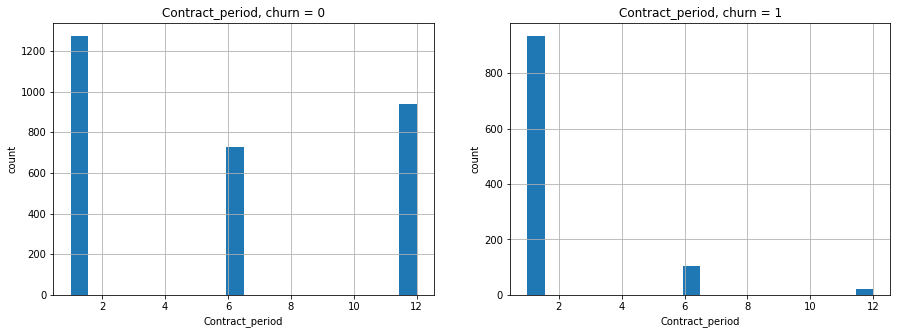

------------------------------------------------------------------------------------------------------------------------


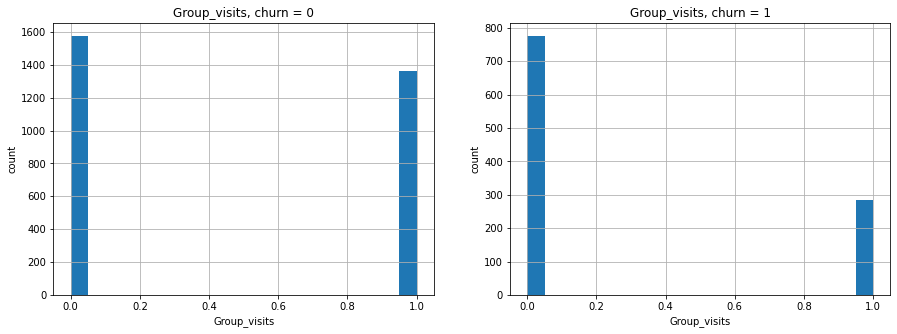

------------------------------------------------------------------------------------------------------------------------


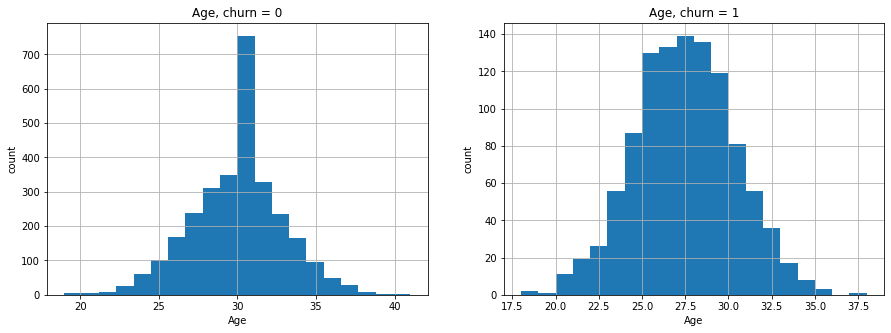

------------------------------------------------------------------------------------------------------------------------


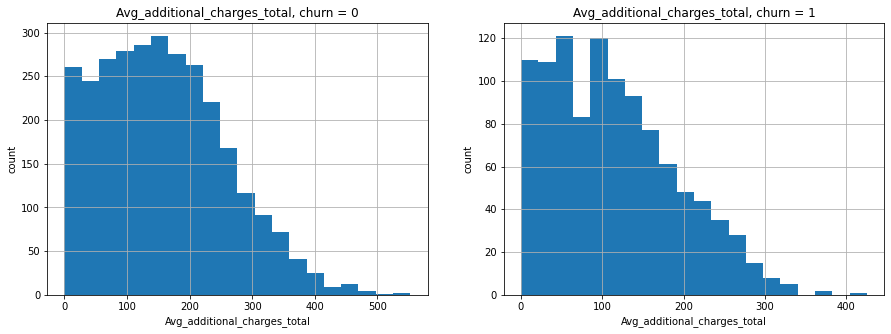

------------------------------------------------------------------------------------------------------------------------


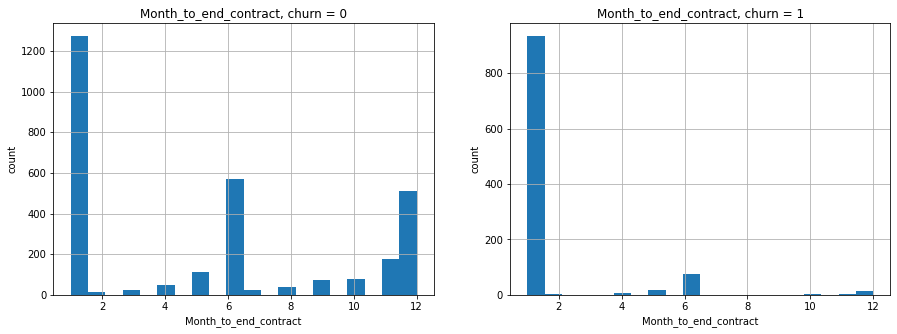

------------------------------------------------------------------------------------------------------------------------


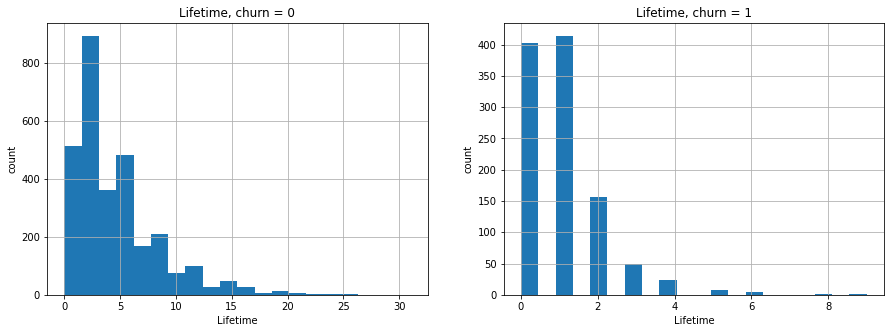

------------------------------------------------------------------------------------------------------------------------


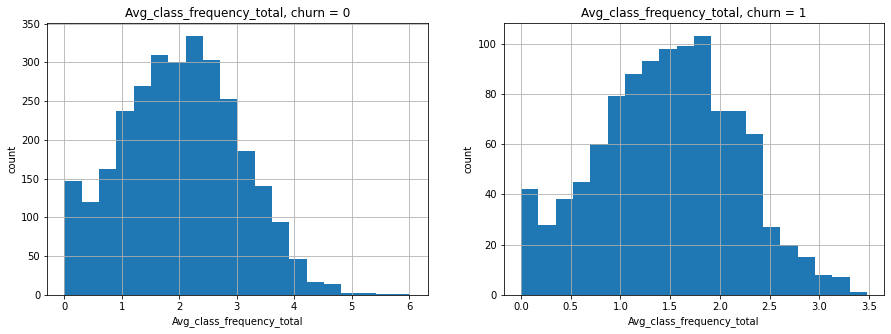

------------------------------------------------------------------------------------------------------------------------


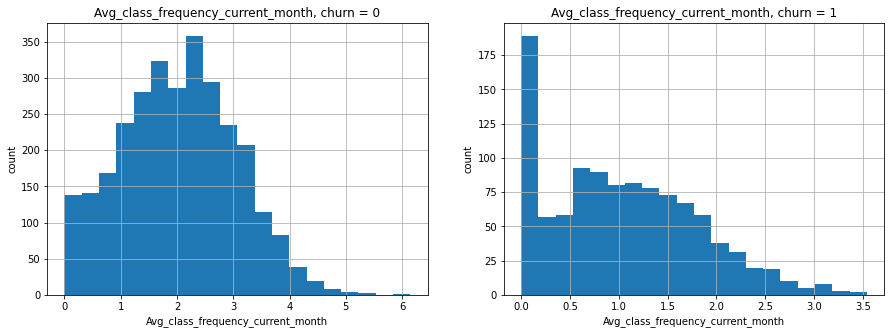

------------------------------------------------------------------------------------------------------------------------


In [10]:
for col in data.drop('Churn', axis=1).columns:
        plt.figure(figsize=[15, 5])
        
        plt.subplot(1, 2, 1)
        plt.title(col+', churn = 0')
        data.query('Churn == 0')[col].hist(bins=20)
        plt.xlabel(col)
        plt.ylabel('count')
        
        plt.subplot(1, 2, 2)
        plt.title(col+', churn = 1')
        data.query('Churn == 1')[col].hist(bins=20)
        plt.xlabel(col)
        plt.ylabel('count')
        
        plt.show()
        
        print(120*'-')

Большая часть ушедших клиентов не является сотрудниками компаний-партнёров клуба.   
Около половины клиентов, продолждающих заниматься в клубе, пришли в рамках акции «приведи друга». Среди ушедших таких около 30%.   
У большинства клиентов с фактом оттока длительность текущего абонемента - 1 месяц. Возможно абонемент брался, чтобы опробовать клуб, но по различным обстоятельствам не подошел. Также возможно это сезонное явление, в период летних отпусков люди хотят привести себя в форму для пляжа. Такая же ситуация соответственно и со сроком до окончания текущего абонемента. Время с момента первого обращения в фитнес-центр у большиства 0 и 1 месяц.      
Среди уходящих клиентов посещяли групповые заянтия менее 30%. Средя занимающихся же посещают групповые занятия около 45%.   
  

In [11]:
cm = data.corr()

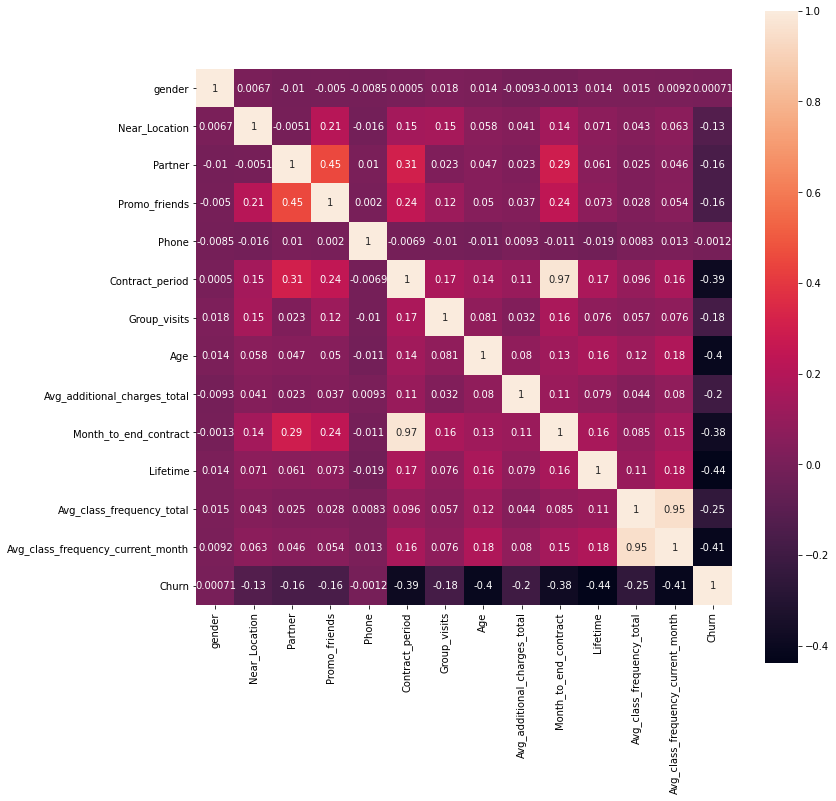

In [12]:
plt.figure(figsize=[12, 12])
sns.heatmap(cm, annot=True, square=True)
plt.show()

Сильная корреляция между `Avg_class_frequency_current_month` и `Avg_class_frequency_total` (0.95), а также между `Month_to_end_contract` и `Contract_period` (0.97).
Удалим `Month_to_end_contract` и `Avg_class_frequency_total`.

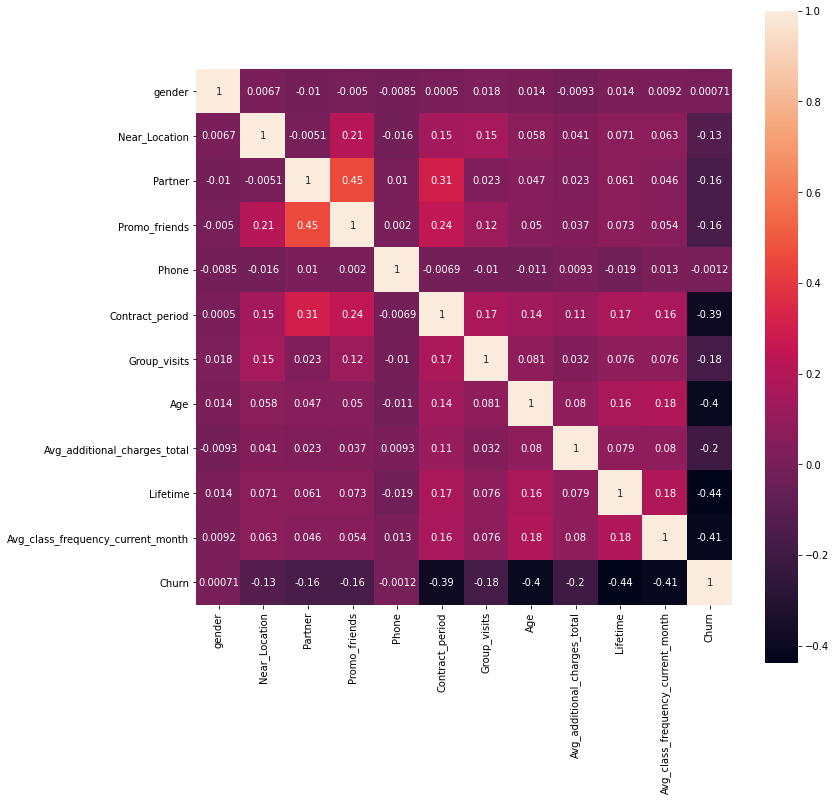

In [13]:
data_corr = data.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis=1)
cm = data_corr.corr()
plt.figure(figsize=[12, 12])
sns.heatmap(cm, annot=True, square=True)
plt.show()

Теперь коэффициенты корреляции не превышают 0.45.

## Модель прогнозирования оттока клиентов

Разделим данные на обучающую (X_train, y_train) и валидационную выборку (X_test, y_test).

In [14]:
X = data_corr.drop('Churn', axis=1)
y = data_corr.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце, двумя способами:
* логистической регрессией (LogisticRegression),
* случайным лесом (RandomForestClassifier).


In [15]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)
probablities_lr = model_lr.predict_proba(X_test)

In [16]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)
probablities_rf = model_rf.predict_proba(X_test)

Сравним модели по метрикам accuracy, precision и recall на валидационной выборке.

In [17]:
pd.DataFrame(data=[
    [accuracy_score(y_test, predictions_lr), accuracy_score(y_test, predictions_rf)],
    [precision_score(y_test, predictions_lr), precision_score(y_test, predictions_rf)],
    [recall_score(y_test, predictions_lr), recall_score(y_test, predictions_rf)]
], columns=['LogisticRegression', 'RandomForestClassifier'], index=['accuracy_score', 'precision_score', 'recall_score'])

,LogisticRegression,RandomForestClassifier
accuracy_score,0.896250,0.896250
precision_score,0.791878,0.814208
recall_score,0.787879,0.752525


Обе модели показали себя весьма неплохо. Доля правильных ответов у обеих моделей одинакова, точность чуть выше у модели случайного леса, а полнота у модели логистической регрессии. В нашем случаее важнее полнота, поэтому выбираем модель логистической регрессии.

## Кластеризация клиентов

Стандартизируем данные

In [18]:
sc = StandardScaler()
data_sc = sc.fit_transform(data)

Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму. 

In [19]:
linked = linkage(data_sc, method = 'ward') 

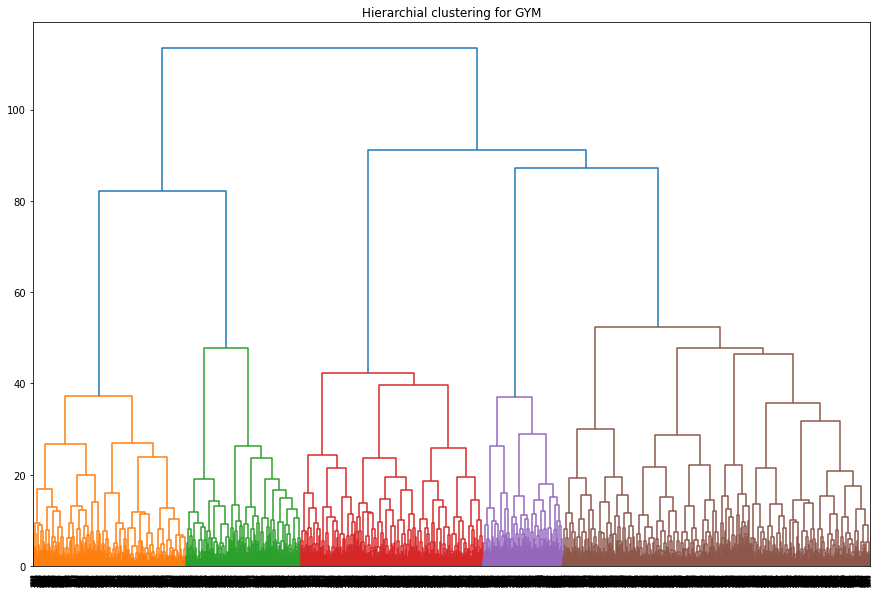

In [20]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

На основании полученного графика поделим данные на 5 кластеров.

In [21]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(data_sc)

In [22]:
cluster_data = data.copy()

In [23]:
cluster_data['cluster'] = labels

Посмотрим на средние значения признаков в разрезе кластеров.

In [24]:
cluster_data.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.503676,0.492829,0.507917,0.521186,0.518895
Near_Location,0.000000,0.936115,1.000000,0.996610,0.968023
Partner,0.459559,0.764016,0.323995,0.282203,0.744186
Promo_friends,0.075368,0.534550,0.213155,0.208475,0.526163
Phone,0.917279,0.919166,0.903776,0.904237,0.873547
Contract_period,2.069853,10.447197,1.546894,1.882203,8.859012
Group_visits,0.211397,0.516297,0.287454,0.452542,0.534884
Age,28.522059,29.962190,26.926918,30.237288,29.728198
Avg_additional_charges_total,132.741216,161.853561,113.173051,157.988625,162.907495
Month_to_end_contract,1.950368,9.477184,1.500609,1.794915,8.155523


Посмотрим на распределение признаков по кластерам.

gender


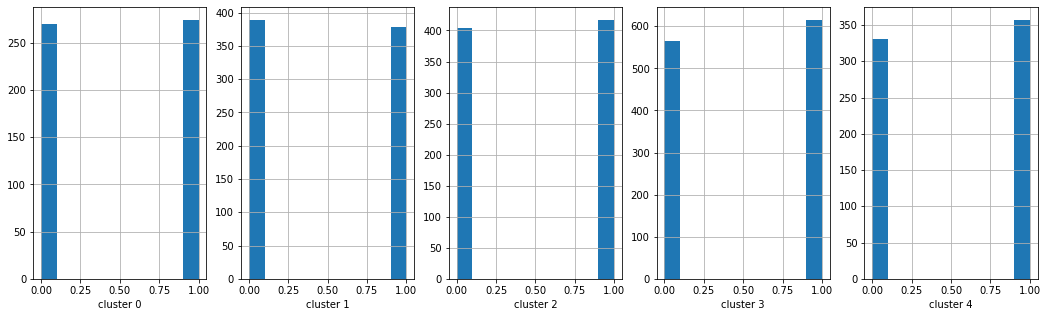

------------------------------------------------------------------------------------------------------------------------
Near_Location


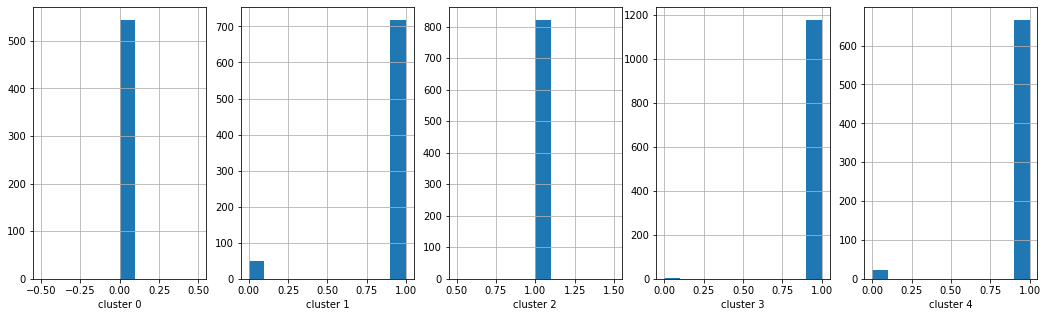

------------------------------------------------------------------------------------------------------------------------
Partner


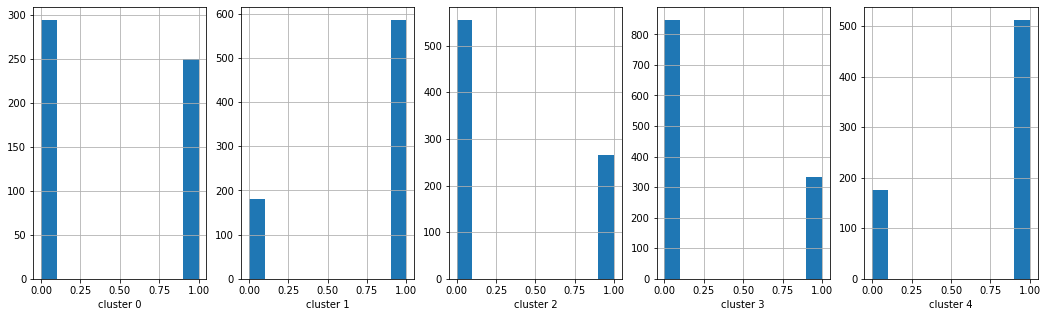

------------------------------------------------------------------------------------------------------------------------
Promo_friends


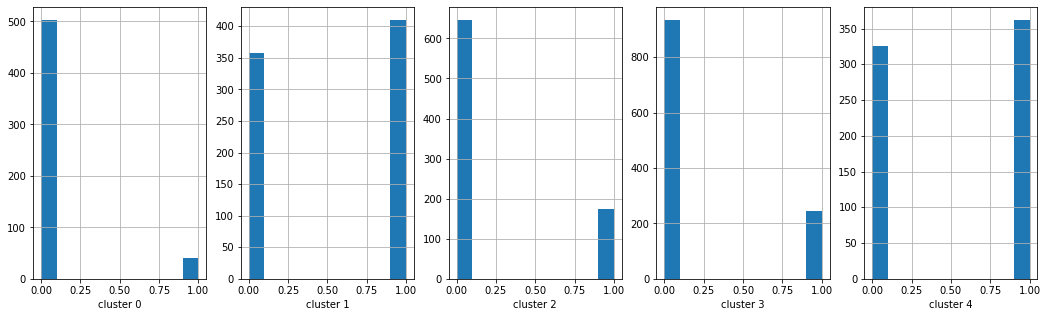

------------------------------------------------------------------------------------------------------------------------
Phone


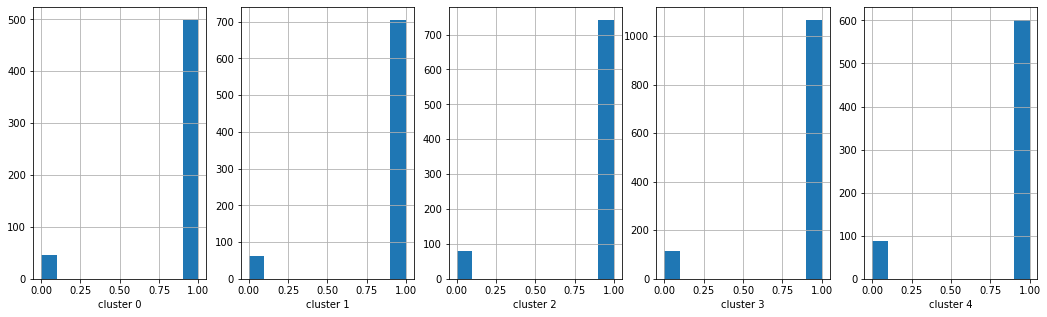

------------------------------------------------------------------------------------------------------------------------
Contract_period


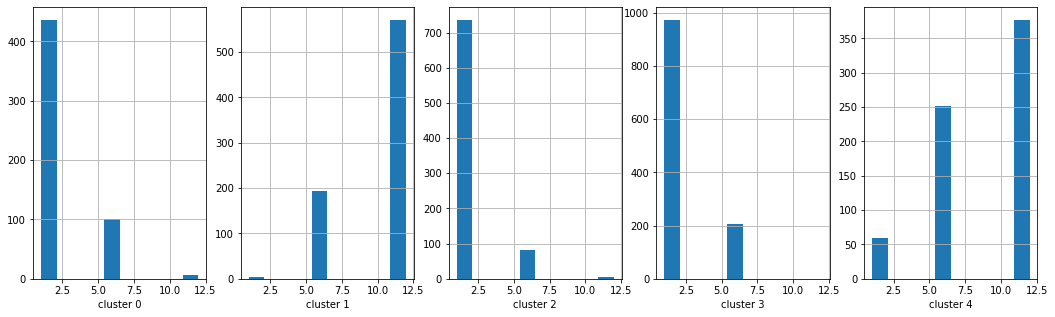

------------------------------------------------------------------------------------------------------------------------
Group_visits


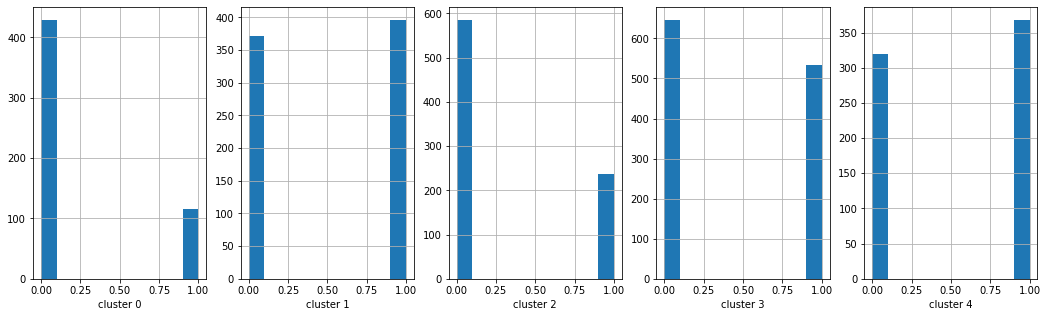

------------------------------------------------------------------------------------------------------------------------
Age


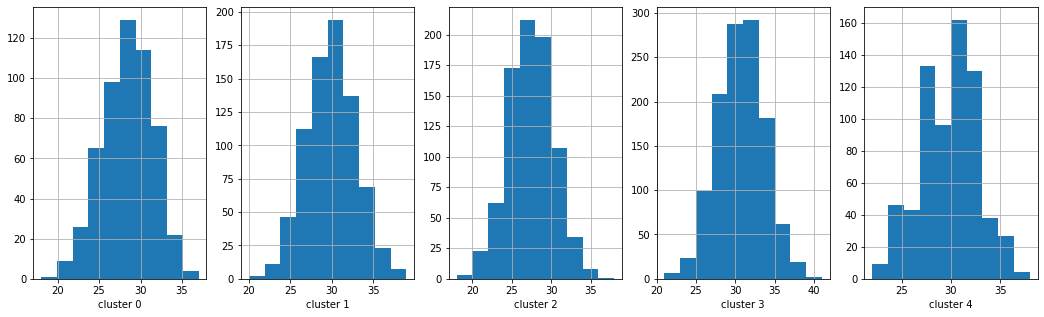

------------------------------------------------------------------------------------------------------------------------
Avg_additional_charges_total


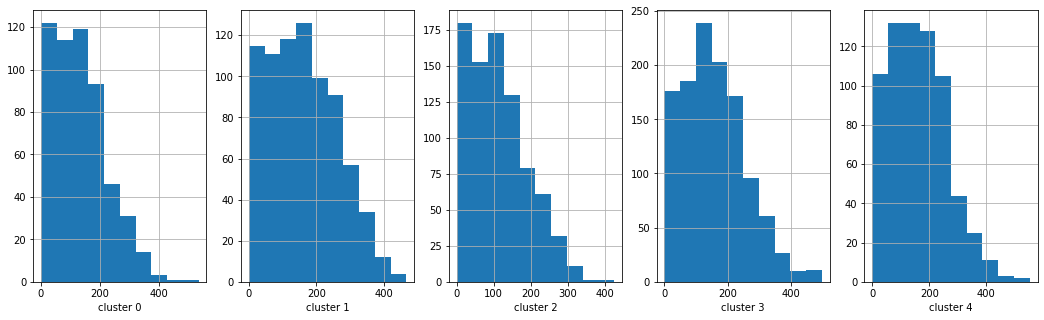

------------------------------------------------------------------------------------------------------------------------
Month_to_end_contract


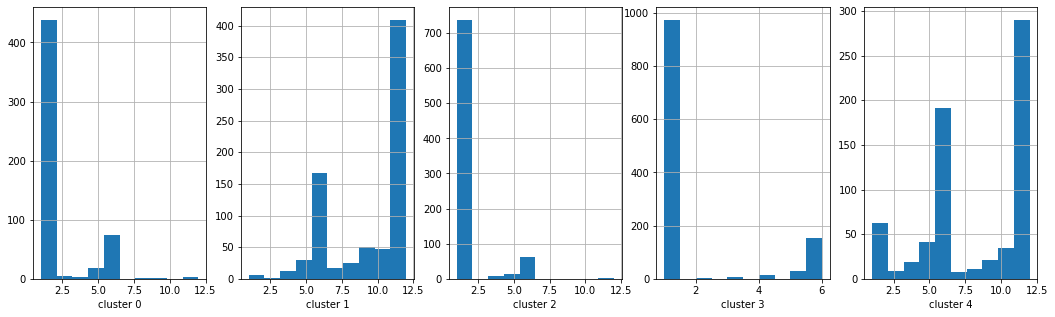

------------------------------------------------------------------------------------------------------------------------
Lifetime


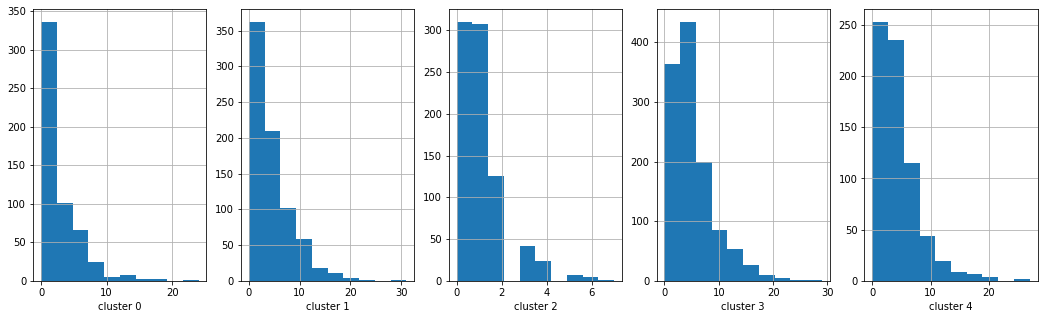

------------------------------------------------------------------------------------------------------------------------
Avg_class_frequency_total


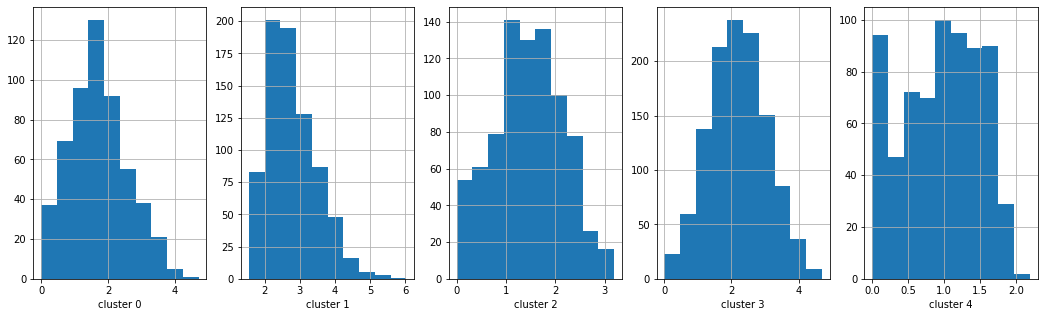

------------------------------------------------------------------------------------------------------------------------
Avg_class_frequency_current_month


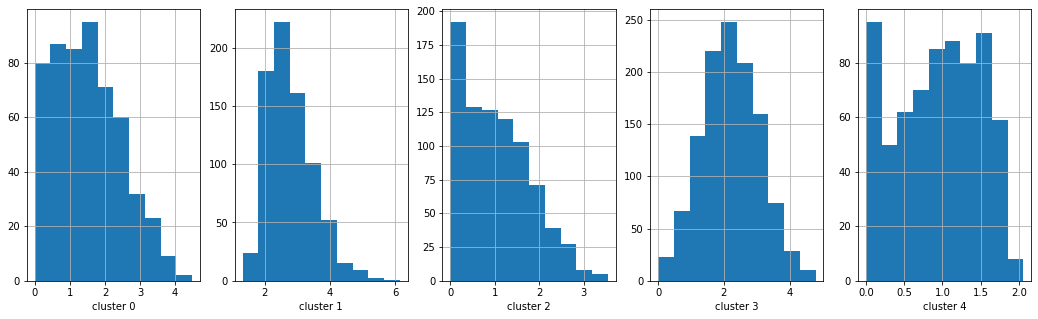

------------------------------------------------------------------------------------------------------------------------
Churn


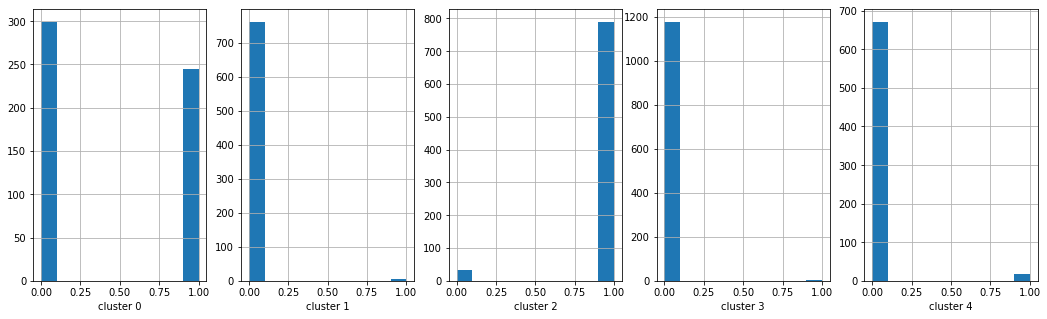

------------------------------------------------------------------------------------------------------------------------


In [54]:
for col in cluster_data.drop('cluster', axis=1).columns:
    plt.figure(figsize=[18, 5])
    print(col)
    for cl in cluster_data.cluster.unique():
        plt.subplot(1, 5, cl+1)
        cluster_data.query('cluster == @cl')[col].hist()
        plt.xlabel(f'cluster {cl}')
        
    plt.show()
    print(120*'-')

In [27]:
cluster_data.groupby('cluster').Churn.sum() / cluster_data.groupby('cluster').Churn.count() * 100

cluster
0    45.036765
1     0.782269
2    96.102314
3     0.338983
4     2.470930
Name: Churn, dtype: float64

Кластеры 2 и 0 склонны к оттоку. У кластера 2 96% оттока, у кластера 0 - 45%.

## Выводы

Большая часть уходящих клиентов приобретали абонемент на 1 месяц. Отделу маркетинга стоит обзвонить таких клиентов и узнать причину, почему клиент не стал продлять абонемент. Стоит предложить скидку на продление. Но возможно это сезонное явление и люди хотят за 1 месяц привести себя в форму.   
Также большая часть оттока не посещает групповые занятия. Возможно стоит пересмотреть расписание и добавить новые программы, предварительно проведя опрос клиентов.   
Для прогнозирования оттока клиентов обучена модель логистической регрессии.   
Также проведена кластеризация данных на 5 кластеров, наиболее склонны к оттоку клиенты в кластере 2, также достаточно высокий риск в кластере 0.